# Lesson 4: Sorting, Filtering, and Aggregation

## Initial Setup

Import libraries and initialize variables to pick up where we left off in the previous lesson.

In [1]:
import pandas
%matplotlib inline

In [2]:
weather = pandas.read_csv('data/weather_YVR.csv')
weather['Date'] = pandas.to_datetime(weather['Date'])
weather['Rain (inches)'] = weather['Rain (mm)'] / 25.4
weather['T_range (C)'] = weather['T_high (C)'] - weather['T_low (C)']

In [3]:
world = pandas.read_csv('data/gapminder_world_data_2018.csv')
world['area'] = world['population'] / world['pop_density']

# Sorting

- It's often convenient to have data in a sorted form
- In Excel, we can sort our data based on the values in a column
  - We can do the same with `pandas` DataFrames
- We can also use sorting to answer questions about the extreme (highest / lowest) values in our data

In [4]:
weather.describe()

,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
count,29190.000000,29190.000000,29190.000000,29167.000000,29169.000000,29180.000000,29126.000000,29138.000000,29166.000000,29126.000000,29167.000000
mean,1977.479753,6.522336,15.729222,10.133692,13.780767,6.440062,2.985731,0.121779,3.107351,0.117548,7.339826
std,23.093891,3.448584,8.801167,5.803549,6.408815,5.514129,6.231114,1.146298,6.325946,0.245319,2.901213
min,1938.000000,1.000000,1.000000,-14.500000,-11.100000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,1957.000000,4.000000,8.000000,5.900000,8.900000,2.600000,0.000000,0.000000,0.000000,0.000000,5.100000
50%,1977.000000,7.000000,16.000000,10.000000,13.300000,6.700000,0.000000,0.000000,0.000000,0.000000,7.200000
75%,1997.750000,10.000000,23.000000,15.000000,18.900000,11.100000,3.200000,0.000000,3.400000,0.125984,9.400000
max,2017.000000,12.000000,31.000000,28.400000,34.400000,22.400000,91.600000,41.000000,91.600000,3.606299,20.000000


In [5]:
weather.sort_values('T_low (C)').head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
11320,1968-12-29,1968,12,29,-14.5,-11.1,-17.8,0.0,0.0,0.0,0.0,6.7
4396,1950-01-14,1950,1,14,-14.2,-10.6,-17.8,0.0,0.5,0.5,0.0,7.2
4407,1950-01-25,1950,1,25,-11.4,-5.6,-17.2,0.0,18.0,18.0,0.0,11.6
4400,1950-01-18,1950,1,18,-12.0,-7.2,-16.7,0.0,0.0,0.0,0.0,9.5
9846,1964-12-16,1964,12,16,-13.4,-10.0,-16.7,0.0,0.0,0.0,0.0,6.7


For example, the coldest temperature in `weather` is -17.8 C.
  - When did this coldest temperature occur?
  - Was there any snow on this date?

We can answer these questions by using the `sort_values` method to sort the DataFrame based on the values in the `'T_low (C)'` column:

In [6]:
weather_sorted = weather.sort_values('T_low (C)')
weather_sorted.head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
11320,1968-12-29,1968,12,29,-14.5,-11.1,-17.8,0.0,0.0,0.0,0.0,6.7
4396,1950-01-14,1950,1,14,-14.2,-10.6,-17.8,0.0,0.5,0.5,0.0,7.2
4407,1950-01-25,1950,1,25,-11.4,-5.6,-17.2,0.0,18.0,18.0,0.0,11.6
4400,1950-01-18,1950,1,18,-12.0,-7.2,-16.7,0.0,0.0,0.0,0.0,9.5
9846,1964-12-16,1964,12,16,-13.4,-10.0,-16.7,0.0,0.0,0.0,0.0,6.7


The coldest temperature was on Dec 29, 1968, and it was not accompanied by snow or other preciptation.

> Note: the above code does not modify our original DataFrame `weather`.

- `sort_values` sorts in ascending order (lowest to highest) by default
- We can switch this using the `ascending` keyword argument.
- For example, what date had the most snow and how cold was it?

In [7]:
weather.sort_values('Snow (cm)', ascending=False).head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
21524,1996-12-29,1996,12,29,-5.2,-1.4,-9.0,2.0,41.0,40.0,0.078740,7.6
11322,1968-12-31,1968,12,31,-6.4,-2.2,-10.6,0.8,31.2,20.1,0.031496,8.4
19356,1990-12-30,1990,12,30,-3.9,0.1,-7.8,0.0,30.0,14.0,0.000000,7.9
12065,1971-01-13,1971,1,13,-7.2,-6.1,-8.3,0.0,29.7,14.2,0.000000,2.2
19038,1990-02-15,1990,2,15,-1.2,0.5,-2.9,0.0,28.6,15.2,0.000000,3.4


The largest daily snowfall was 41 cm on Dec 29, 1996, with a daily low temperature of -9 C.

# Filtering

We can extract rows from a DataFrame or Series based on a criteria
- Similar to applying a filter in Excel

With filtering, we can answer questions like:
- How many days had temperatures below -15 C?
- In which years did these occur?
- Which year had the most days with temperatures below -15 C?

First we use the comparison operator `<` on the `'T_low'` column:

In [8]:
cold = weather['T_low (C)'] < -15
cold

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
29160    False
29161    False
29162    False
29163    False
29164    False
29165    False
29166    False
29167    False
29168    False
29169    False
29170    False
29171    False
29172    False
29173    False
29174    False
29175    False
29176    False
29177    False
29178    False
29179    False
29180    False
29181    False
29182    False
29183    False
29184    False
29185    False
29186    False
29187    False
29188    False
29189    False
Name: T_low (C), Length: 29190, dtype: bool

- `cold` is a Boolean Series of length equal to the number of rows of `weather`
- The index of `cold` is equal to the index of `weather`

We can find the number of days with temperatures below -15 C by using the `sum` method:
- When you sum a Boolean series, `True` is treated as 1 and `False` as 0.

In [9]:
cold.sum()

17

So to answer our first question: during the period 1938-2017, there were a total of 17 days with temperatures below -15 C measured at Vancouver airport.

We can use the Boolean Series `cold` as a **filter** to extract the rows of `weather` which have temperatures below -15 C
- Previously we used square brackets and a column name or list of column names to extract *column(s)* from a DataFrame (e.g. `series_X = df['X']`)
- Now we use square brackets and a Boolean Series to extract *rows* from a DataFrame

In [10]:
weather_cold = weather[cold]
weather_cold

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
1847,1943-01-22,1943,1,22,-12.2,-8.3,-16.1,0.0,0.0,0.0,0.0,7.8
1848,1943-01-23,1943,1,23,-10.0,-4.4,-15.6,0.0,0.0,0.0,0.0,11.2
4395,1950-01-13,1950,1,13,-13.6,-11.1,-16.1,0.0,0.0,0.0,0.0,5.0
4396,1950-01-14,1950,1,14,-14.2,-10.6,-17.8,0.0,0.5,0.5,0.0,7.2
4400,1950-01-18,1950,1,18,-12.0,-7.2,-16.7,0.0,0.0,0.0,0.0,9.5
4407,1950-01-25,1950,1,25,-11.4,-5.6,-17.2,0.0,18.0,18.0,0.0,11.6
4410,1950-01-28,1950,1,28,-9.2,-2.8,-15.6,0.0,0.0,0.0,0.0,12.8
4412,1950-01-30,1950,1,30,-10.6,-5.6,-15.6,0.0,0.0,0.0,0.0,10.0
4414,1950-02-01,1950,2,1,-10.6,-5.0,-16.1,0.0,0.0,0.0,0.0,11.1
9846,1964-12-16,1964,12,16,-13.4,-10.0,-16.7,0.0,0.0,0.0,0.0,6.7


In [11]:
weather_cold.shape

(17, 12)

`weather_cold` is a DataFrame containing only the 17 rows of `weather` that have temperatures below -15 C.

To see a list of the unique years and the counts for each of them, we can use the `value_counts` method:

In [12]:
weather_cold['Year'].value_counts()

1950    7
1969    3
1968    3
1943    2
2008    1
1964    1
Name: Year, dtype: int64

So to answer our second and third questions:
- Temperatures below -15 C were measured in 6 years (1950, 1969, 1968, 1943, 2008, 1964)
- The year with the most days with temperature < -15 C was 1950.

- We can use any of the comparison operators (`>`, `>=`, `<`, `<=`, `==`, `!=`) on a DataFrame column to create Boolean Series for filtering our data
- We can also apply comparison operators and other functions to an entire DataFrame to create a DataFrame of Boolean values corresponding to some criteria
  - This can be useful for counting how often something occurs in each row or column of data, such as missing values

# Bonus: Missing Data

With any data that we're working with, it's good to know:
  - How many values are missing?
  - Where are the empty cells located in our DataFrame (or Series)?

The `isnull` method returns `True` when data is missing (`NaN`) and `False` otherwise
- We can use this method to locate and count missing values

In [13]:
weather_missing = weather.isnull()
weather_missing.head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
0,False,False,False,False,False,False,False,True,True,False,True,False
1,False,False,False,False,False,False,False,True,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


- `weather_missing` is a Boolean DataFrame
- The `sum` method will sum the Boolean values along each column and give us the missing counts:

In [14]:
weather_missing.sum()

Date                  0
Year                  0
Month                 0
Day                   0
T_mean (C)           23
T_high (C)           21
T_low (C)            10
Rain (mm)            64
Snow (cm)            52
Total Precip (mm)    24
Rain (inches)        64
T_range (C)          23
dtype: int64

- With `pandas` tools, it is very easy to assess the completeness of your data and drill down to find exactly where any missing values are occurring.
- Other useful methods for handling missing data include `dropna`, `fillna`, and `interpolate`.

# Aggregation

Returning to our `world` data:

In [15]:
world.head()

,country,population,region,sub_region,income_group,life_expectancy,gdp_per_capita,children_per_woman,child_mortality,pop_density,area
0,Afghanistan,36400000,Asia,Southern Asia,Low,58.7,1870,4.33,65.90,55.7,6.535009e+05
1,Albania,2930000,Europe,Southern Europe,Upper middle,78.0,12400,1.71,12.90,107.0,2.738318e+04
2,Algeria,42000000,Africa,Northern Africa,Upper middle,77.9,13700,2.64,23.10,17.6,2.386364e+06
3,Angola,30800000,Africa,Sub-Saharan Africa,Lower middle,65.2,5850,5.55,81.60,24.7,1.246964e+06
4,Antigua and Barbuda,103000,Americas,Latin America and the Caribbean,High,77.6,21000,2.03,7.89,234.0,4.401709e+02


Suppose we want to find the population totals *in each region* of our `world` data.
- Using the techniques we just learned, we could extract the rows for Asia, take the sum of the population column, and then repeat this process for each of the other regions.
- This would be very slow and tedious!

Luckily, with `pandas` there is a better way: using aggregation to compute statistics for groups within our data.
- Similar to pivot tables in Excel or `GROUPBY` queries in SQL.

Aggregation is a "split-apply-combine" technique:

![Image credit Jake VanderPlas](img/split-apply-combine.png)

*Image credit Jake VanderPlas*

For simple aggregations, we can use the `groupby` method chained with a summary statistic (e.g., `sum`, `mean`, `median`, `max`, etc.)
- We will group by region and take the sum:

In [16]:
world.groupby('region').sum()

,population,life_expectancy,gdp_per_capita,children_per_woman,child_mortality,pop_density,area
region,,,,,,,
Africa,1286388200,3377.7,286250,219.04,3298.60,5275.26,2.938634e+07
Americas,1010688000,2353.7,503220,66.48,525.03,3709.97,3.832191e+07
Asia,4514211000,3495.3,967920,112.93,1044.10,20558.53,3.100979e+07
Europe,742109000,3080.8,1314760,62.66,183.85,5753.26,2.213814e+07
Oceania,40212000,624.8,112770,27.78,217.25,502.02,8.481225e+06


> Note that this DataFrame has the *region* as its index (text labels in bold) instead of integer row numbers.

- Many of these columns are not useful - for example, it is not meaningful to add up a sum total of life expectancies.
- It's helpful to extract the column we're interested in:

In [17]:
region_pop_totals = world.groupby('region')['population'].sum()
region_pop_totals

region
Africa      1286388200
Americas    1010688000
Asia        4514211000
Europe       742109000
Oceania       40212000
Name: population, dtype: int64

We can plot the totals as a bar chart:

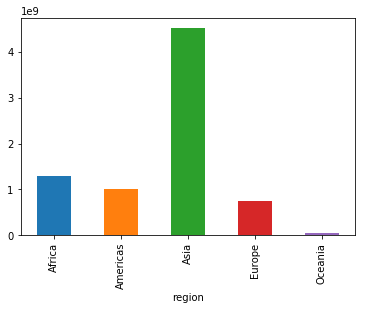

In [18]:
region_pop_totals.plot(kind='bar');

We can find the size of the most populous country in each region by aggregating with `max` instead of `sum`:

In [19]:
world.groupby('region')['population'].max()


region
Africa       196000000
Americas     327000000
Asia        1420000000
Europe       144000000
Oceania       24800000
Name: population, dtype: int64

# Bonus: Fancier Aggregation

We can compute sub-totals by grouping on multiple columns:

In [20]:
world.groupby(['region', 'income_group'])['population'].sum()

region    income_group
Africa    High                 95200
          Low              592992000
          Lower middle     577861000
          Upper middle     115440000
Americas  High             436688000
          Low               11100000
          Lower middle      33310000
          Upper middle     529590000
Asia      High             250060000
          Low              147910000
          Lower middle    2338307000
          Upper middle    1777934000
Europe    High             496070000
          Lower middle      48040000
          Upper middle     197999000
Oceania   High              29550000
          Lower middle       9443000
          Upper middle       1219000
Name: population, dtype: int64

We can use the `agg` method to compute multiple aggregated statistics on our data, for example minimum and maximum country populations in each region:

In [21]:
world.groupby('region')['population'].agg(['min', 'max'])

,min,max
region,,
Africa,95200,196000000
Americas,103000,327000000
Asia,444000,1420000000
Europe,338000,144000000
Oceania,109000,24800000


We can also use `agg` to compute different statistics for different columns:

In [22]:
agg_dict = {'population' : 'sum', 
            'life_expectancy' : ['min', 'max']}
world.groupby('region').agg(agg_dict)

population life_expectancy      
                 sum             min   max
region                                    
Africa    1286388200            51.1  78.0
Americas  1010688000            64.5  82.2
Asia      4514211000            58.7  84.2
Europe     742109000            71.1  83.5
Oceania     40212000            61.1  82.9

For even more complex aggregations, there is also a `pivot_table` method.

# Exercise 4

Working with our DataFrame `world` containing the data from `data/gapminder_world_data_2018.csv`:

**a)** Sort `world` on the `'pop_density'` column from lowest to highest and display the first 10 rows.
- Does Canada appear anywhere in the results? Which country has the lowest population density?
- Now sort from highest to lowest and display the first 10 rows. Which country has the highest population density?

**b)** Let's find out how many countries have life expectancy greater than 80 years and the total number of people living in those countries.
- Create a Boolean Series `long_life` which is `True` for rows where `world['life_expectancy']` is greater than 80, and `False` otherwise.
- Take the sum of `long_life` to find out how many countries have life expectancy > 80.
- Use `long_life` as a filter to extract the rows of `world` with life expectancy > 80, and store the output as a new DataFrame `world_long_life`.
- Use the `sum` method on the `population` column of `world_long_life` to find the total population in these countries. 

**c)** Group by `'income_group'` and take the sum of `'population'` to find the total population in each income group.

### Bonus exercises

**d)** Repeat (a) for the `'population'` column to find the countries with the lowest and highest populations.

**e)** Building on your results from (b), what *fraction* of the world's total population lives in countries with life expectancy above 80 years?

**f)** How many countries have life expectancy > 80 *and* are in the "Upper middle" income group? Which countries are they? Hints:
- In Lesson 1, we saw the `and`, `or`, and `not` logical operators. When working with arrays of data such `pandas` Series and DataFrames, we have to use different operators: `&` (and), `|` (or), `~` (not). So for example, to find which countries in Europe have population above 20 million, we could create the Boolean Series:

```python
europe_high_pop = (world['region'] == 'Europe') & (world['population'] > 2e7)
```

- Note the parentheses around the expressions on either side of `&` - these are very important! The `&` operator has precedence over the `==` and `>` comparison operators, so parentheses are necessary to ensure the correct order of operations.

**g) Data wrangling - downloading and concatenating Environment Canada weather data**

Now we'll put all the pieces together to download and concatenate YVR weather data from Environment Canada!
- First, I recommend making a copy of the `data/raw` sub-folder so that you can preserve the original files in case you need them.
- If you haven't already, complete previous bonus exercise 2(f) to import the local file `ecweather.py` as a library.

Copy the code below into your notebook and run it:

```python
# Environment Canada station ID code for Vancouver Airport
station_id = 889

# Save CSV file for 1938
year = 1938
savefile = 'data/raw/downloaded_weather_YVR_' + str(year) + '.csv'
ecweather.download_daily_raw(env_canada_id=station_id, year=year, savefile=savefile)
```

If it ran successfully, you'll have a new file `downloaded_weather_YVR_1938.csv` in the `data/raw` sub-folder. Check out the file in JupyterLab CSV viewer.

Next, using the code above and previous bonus exercise 3(h) as a guide, create a loop which loops over the years 1938-2012 and downloads the CSV file for each year. Run your code and check the files in the `data/raw` sub-folder to make sure the files were saved properly.

> Note: Environment Canada changed its station ID code for Vancouver Airport in mid-2013, which completes things. To keep this exercise simple, we'll only work with data from 1938-2012.

Finally, create a for loop, based on your work in previous bonus exercise 3(h), to read each CSV file into a DataFrame and concatenate them all together into a single DataFrame. Check that the shape, dates, etc. in the merged data make sense, and save the merged data to a CSV file `data/merged_weather_YVR_1938-2012.csv`.

**Data wrangling mission completed! Great work!!!**

> If you want to see all the nitty gritty details that went into creating the full 1938-2017 file we used in earlier exercises, check out the notebooks in the `wrangling-env-canada` folder. 

[previous lesson](3-basic-calculations-plots.ipynb) | [next lesson](5-indexing-subsets.ipynb)

[home](0-introduction.ipynb)